In [1]:
from utils import *
import os
from nilearn import plotting
from sys import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Meta-analysis

In [3]:
if platform == 'darwin':
    root = '/Volumes/GoogleDrive/My Drive/Schiller-Gu-Lab/Projects/MJCraving/ConnSig/'
elif platform == 'win32':
    root = 'G:/My Drive/Schiller-Gu-Lab/Projects/MJCraving/ConnSig/'
elif platform == 'linux':
    root = '/mnt/synapse/projects/MJCraving/ConnSig/github_repo/'
parcel_names = np.load(f'{root}/data/stanford_parcel_names.npy')

In [4]:
x = stanford_parcellate(f'{root}/data/craving_association-test_z_FDR_0.01.nii.gz', root)
x['parcel_name'] = parcel_names
df_association = pd.DataFrame(x)

In [5]:
y = stanford_parcellate(f'{root}/data/craving_uniformity-test_z_FDR_0.01.nii.gz', root)
y['parcel_name'] = parcel_names
df_uniformity = pd.DataFrame(y)

In [8]:
# ROI list obtained from the top 20 most important regions in predictive importance analysis
roi_list = [
    'vent_DMN_7', 'ant_sal_3', 'sensorimotor_1', 
    'dors_DMN_1', 'dors_DMN_6', 'recn_3', 
    'visiospatial_8', 'auditory_2', 'dors_DMN_4', 'lang_6'
]

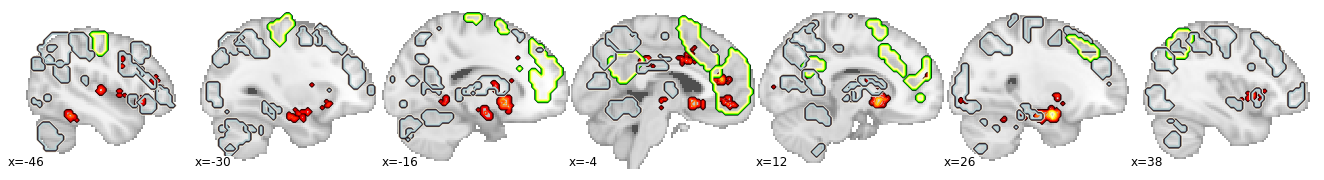

In [9]:
# Uniformity map visualization
display = plotting.plot_anat(display_mode='x', cut_coords=7)
display.add_contours(f'{root}/data/craving_uniformity-test_z_FDR_0.01.nii.gz', linewidth=0.5, cmap=plotting.cm.black_red)

for filename in sorted(os.listdir(f'{root}/data/3mm_Stanford_ROIs/')):
    if not filename.endswith('nii'):
        continue
    if filename.split('.')[0] in roi_list:
        display.add_contours(f'{root}/data/3mm_Stanford_ROIs/{filename}', cmap=plotting.cm.black_green)
    else:
        display.add_contours(f'{root}/data/3mm_Stanford_ROIs/{filename}', cmap=plotting.cm.brown_blue)

plotting.show()

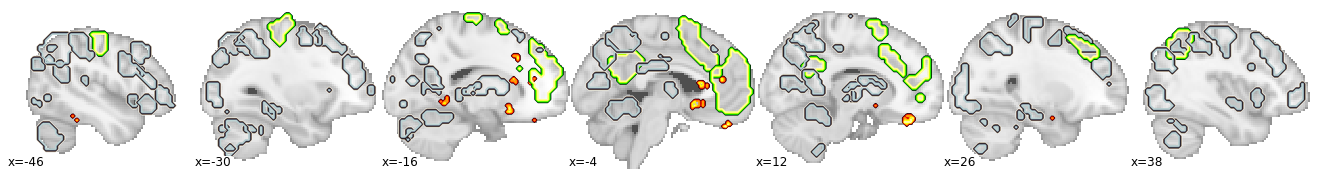

In [10]:
# Association map visualization
display = plotting.plot_anat(display_mode='x', cut_coords=7)
display.add_contours(f'{root}/data/craving_association-test_z_FDR_0.01.nii.gz', linewidth=0.5, cmap=plotting.cm.black_red)

for filename in sorted(os.listdir(f'{root}/data/3mm_Stanford_ROIs/')):
    if not filename.endswith('nii'):
        continue
    if filename.split('.')[0] in roi_list:
        display.add_contours(f'{root}/data/3mm_Stanford_ROIs/{filename}', cmap=plotting.cm.black_green)
    else:
        display.add_contours(f'{root}/data/3mm_Stanford_ROIs/{filename}', cmap=plotting.cm.brown_blue)

plotting.show()